# FEATURE SELECTION avec SKLEARN

## VarienceThreshold
### feature_selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [3]:
from sklearn.feature_selection import VarianceThreshold

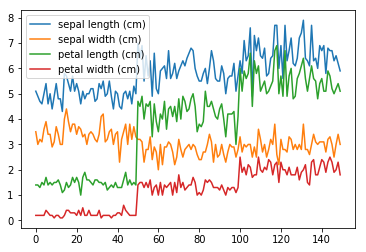

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [5]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [6]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
selector.get_support()

array([ True, False,  True,  True])

In [7]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='|S17')

# --------------------------------------------------------------------------------------------------

## SelectBest
### feature_selection

In [8]:
from sklearn.feature_selection import SelectKBest, chi2

In [9]:
chi2(X,y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [10]:
selector = SelectKBest(chi2,k=2)
selector.fit_transform(X,y)
selector.get_support()

array([False, False,  True,  True])

# --------------------------------------------------------------------------------------------------

## SelectFromModel
### feature_selection

In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [12]:
selector = SelectFromModel(SGDClassifier(random_state=0),threshold='mean')
selector.fit_transform(X,y)
selector.get_support()
selector.estimator_.coef_

C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([[   5.71755289,   24.58547742,  -36.59233848,  -17.15265866],
       [  30.87478559, -162.95025729,   38.87935963,  -85.19153802],
       [-116.06632361,  -94.91137793,  197.25557461,  176.10062893]])

# --------------------------------------------------------------------------------------------------

## RFE + RFECV
### feature_selection

In [13]:
from sklearn.feature_selection import RFE, RFECV

In [17]:
selector = RFECV(SGDClassifier(random_state=0),step=1,min_features_to_select=2,cv=5)

selector.fit(X,y)
selector.ranking_
selector.grid_scores_

array([0.87333333, 0.63333333, 0.54      ])